# Develop Time Series Forecasting Models

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import os

# Ensure 'figs' directory exists for plots
os.makedirs('figs', exist_ok=True)

## Prepare the Data

Training data length: 2028
Testing data length: 507


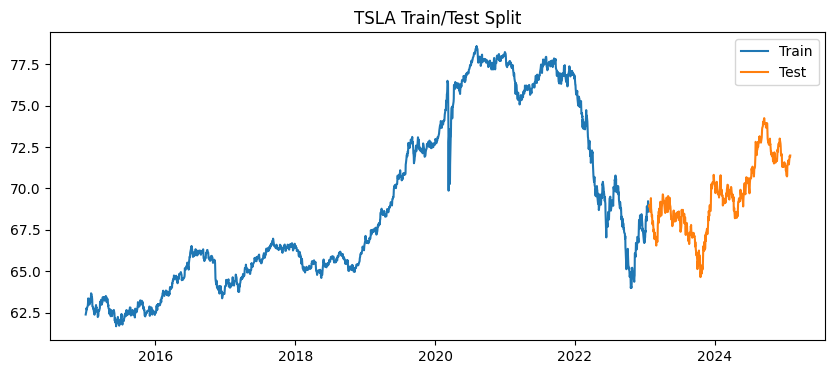

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the saved adjusted close data from Task 1
adj_close = pd.read_csv('../data/raw/adj_close.csv', index_col='Date', parse_dates=True)

# Extract TSLA data
tsla_data = adj_close['TSLA'].dropna()

# Split into training (80%) and testing (20%) sets
train_size = int(len(tsla_data) * 0.8)
train_data = tsla_data[:train_size]
test_data = tsla_data[train_size:]

print(f"Training data length: {len(train_data)}")
print(f"Testing data length: {len(test_data)}")

# Ensure 'figs' directory exists
os.makedirs('figs', exist_ok=True)

# Plot train/test split
plt.figure(figsize=(10, 4))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.title('TSLA Train/Test Split')
plt.legend()
plt.savefig('figs/tsla_train_test_split.png')
plt.show()

## ARIMA Model

/home/bbm/Documents/projects/TimeSeries-Portfolio-Optimization/tsport_env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/bbm/Documents/projects/TimeSeries-Portfolio-Optimization/tsport_env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/bbm/Documents/projects/TimeSeries-Portfolio-Optimization/tsport_env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/bbm/Documents/projects/TimeSeries-Portfolio-Optimization/tsport_env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be r

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-190.637, Time=0.23 sec


/home/bbm/Documents/projects/TimeSeries-Portfolio-Optimization/tsport_env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-188.910, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-188.995, Time=0.20 sec


/home/bbm/Documents/projects/TimeSeries-Portfolio-Optimization/tsport_env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/bbm/Documents/projects/TimeSeries-Portfolio-Optimization/tsport_env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-192.277, Time=0.08 sec


/home/bbm/Documents/projects/TimeSeries-Portfolio-Optimization/tsport_env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-191.491, Time=1.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.056 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2028
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  97.138
Date:                Sat, 08 Mar 2025   AIC                           -192.277
Time:                        18:28:29   BIC                           -186.662
Sample:                             0   HQIC                          -190.217
                               - 2028                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0532      0.000    182.599      0.000       0.053 

/home/bbm/Documents/projects/TimeSeries-Portfolio-Optimization/tsport_env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/bbm/Documents/projects/TimeSeries-Portfolio-Optimization/tsport_env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/bbm/Documents/projects/TimeSeries-Portfolio-Optimization/tsport_env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/bbm/Documents/projects/TimeSeries-Portfolio-Optimization/tsport_env/lib

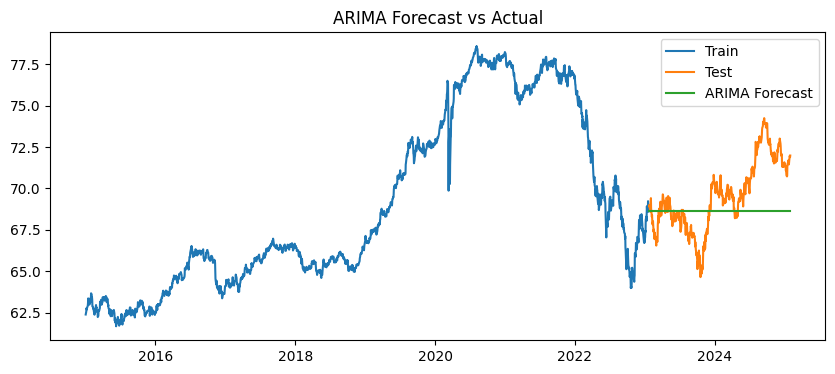

ARIMA Evaluation Metrics:
  - MAE: 1.80
  - RMSE: 2.30
  - MAPE: nan%


/tmp/ipykernel_89858/3086812530.py:31: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test_data - arima_forecast) / test_data)) * 100


In [4]:
# Fit auto_arima to find optimal parameters
arima_model = auto_arima(train_data, 
                         start_p=0, start_q=0, max_p=5, max_q=5, 
                         d=None, seasonal=False, 
                         trace=True, error_action='ignore', 
                         suppress_warnings=True)

# Print the best model parameters
print(arima_model.summary())

# Fit the ARIMA model with best parameters
arima_order = arima_model.order  # e.g., (p, d, q)
arima_fit = SARIMAX(train_data, order=arima_order).fit(disp=False)

# Forecast on test set
arima_forecast = arima_fit.forecast(steps=len(test_data))

# Plot forecast vs actual
plt.figure(figsize=(10, 4))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.savefig('figs/arima_forecast.png')
plt.show()

# Evaluate
mae = mean_absolute_error(test_data, arima_forecast)
rmse = np.sqrt(mean_squared_error(test_data, arima_forecast))
mape = np.mean(np.abs((test_data - arima_forecast) / test_data)) * 100

print(f"ARIMA Evaluation Metrics:")
print(f"  - MAE: {mae:.2f}")
print(f"  - RMSE: {rmse:.2f}")
print(f"  - MAPE: {mape:.2f}%")

## SARIMA Model

In [6]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Use a minimal SARIMA(1,1,0)(0,1,0,252) model
sarima_fit = SARIMAX(train_data, order=(1, 1, 0), seasonal_order=(0, 1, 0, 252)).fit(maxiter=50, disp=False)

# Forecast on test set
sarima_forecast = sarima_fit.forecast(steps=len(test_data))

# Plot forecast vs actual
plt.figure(figsize=(10, 4))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_data.index, sarima_forecast, label='SARIMA Forecast')
plt.title('Ultra-Fast SARIMA Forecast vs Actual')
plt.legend()
plt.savefig('figs/sarima_forecast_ultrafast.png')
plt.show()

# Evaluate
mae = mean_absolute_error(test_data, sarima_forecast)
rmse = np.sqrt(mean_squared_error(test_data, sarima_forecast))
mape = np.mean(np.abs((test_data - sarima_forecast) / test_data)) * 100

print(f"Ultra-Fast SARIMA Evaluation Metrics:")
print(f"  - MAE: {mae:.2f}")
print(f"  - RMSE: {rmse:.2f}")
print(f"  - MAPE: {mape:.2f}%")

/home/bbm/Documents/projects/TimeSeries-Portfolio-Optimization/tsport_env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/bbm/Documents/projects/TimeSeries-Portfolio-Optimization/tsport_env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


: 